In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

In [266]:
X_train = pd.read_csv('ShopingData.csv')
df = X_train.copy()
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [267]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [268]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [269]:
df["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [270]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [271]:
dfwithdummies=df.copy()
dfwithdummies['VisitorType']= label_encoder.fit_transform(df['VisitorType'])
dfwithdummies['Month']= label_encoder.fit_transform(df['Month'])
dfwithdummies.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,2,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,2,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,2,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,2,False,False


In [272]:
dfwithdummies['Class'] = df['Revenue'].astype(int)
dfwithdummies.drop('Revenue', axis = 1, inplace = True)
dfwithdummies['Weekend'] = df['Weekend'].astype(int)
dfcleaned = dfwithdummies.copy()

Text(0, 0.5, 'Frequency')

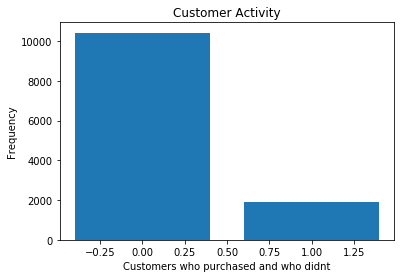

In [273]:
fig, ax = plt.subplots() 
data = X_train['Revenue'].value_counts() 
points = data.index 
frequency = data.values 
ax.bar(points, frequency) 
ax.set_title('Customer Activity') 
ax.set_xlabel('Customers who purchased and who didnt') 
ax.set_ylabel('Frequency')

<Figure size 432x288 with 0 Axes>

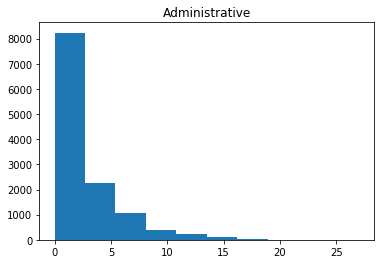

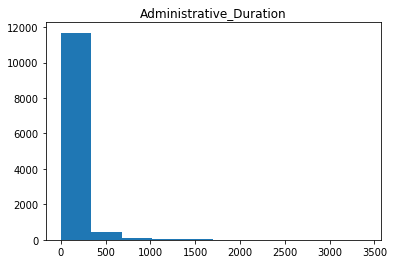

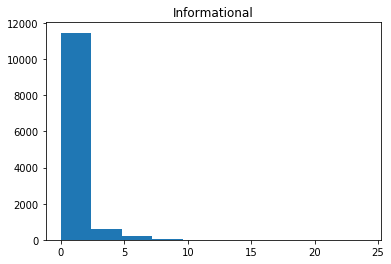

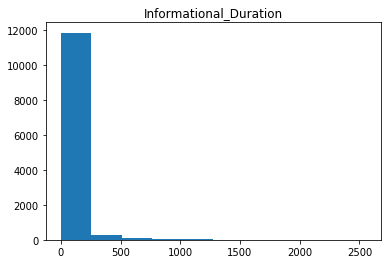

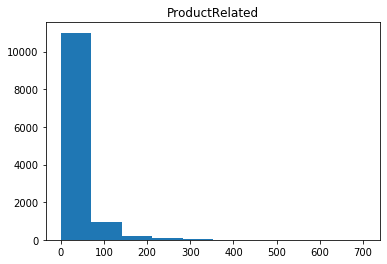

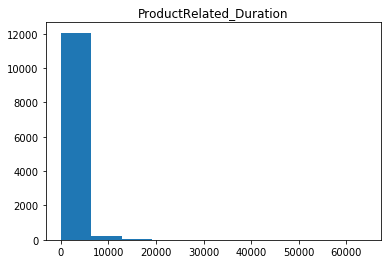

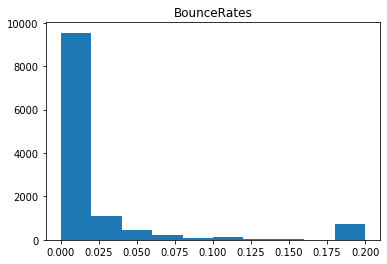

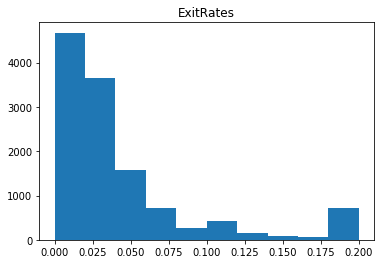

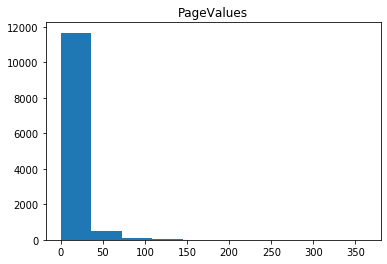

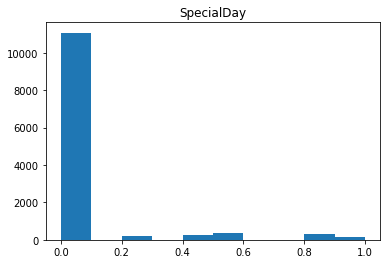

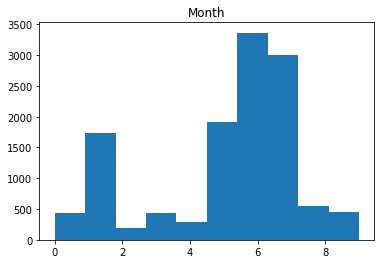

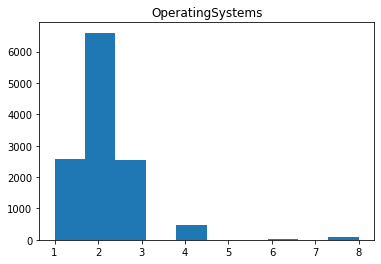

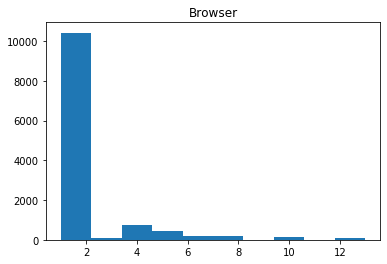

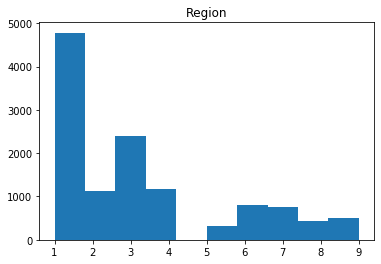

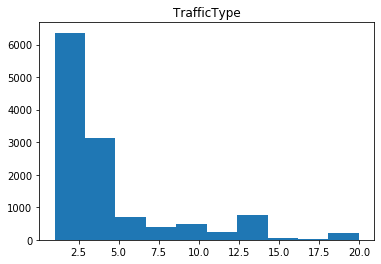

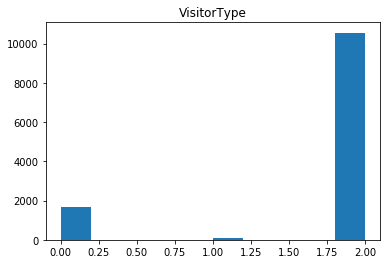

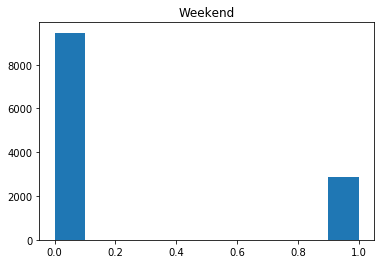

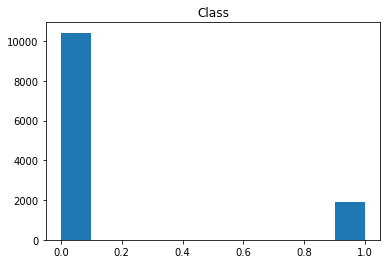

In [274]:
for idx,column in enumerate(dfwithdummies.columns): 
    plt.figure(idx)
    dfwithdummies.hist(column=column,grid=False)

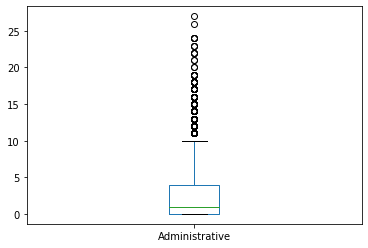

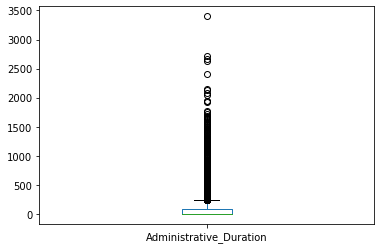

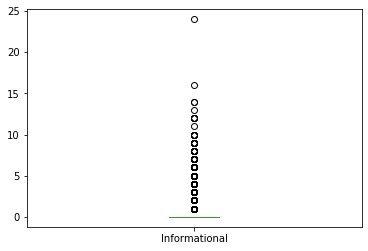

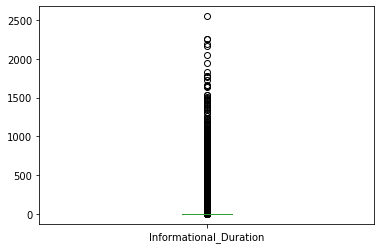

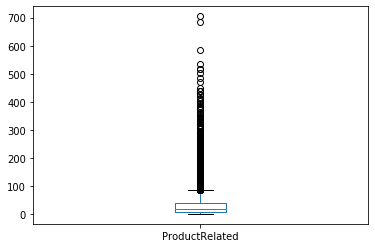

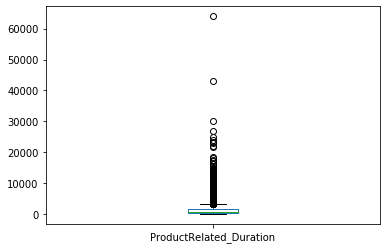

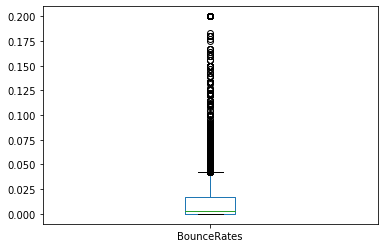

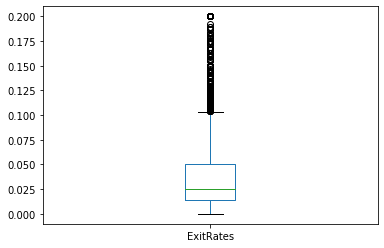

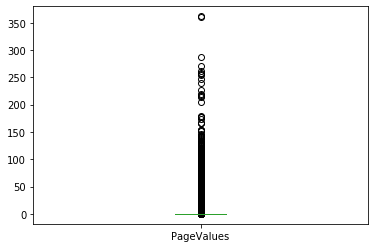

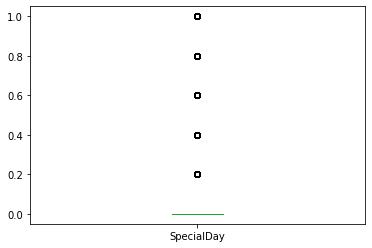

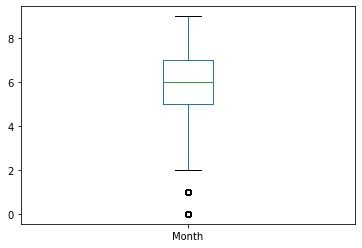

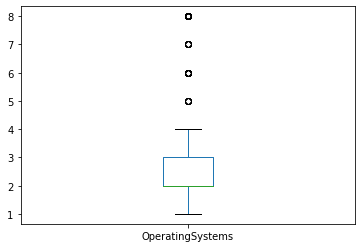

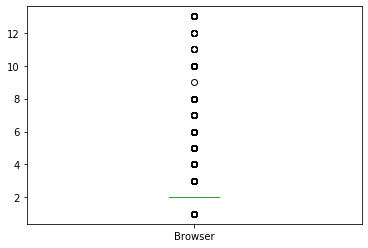

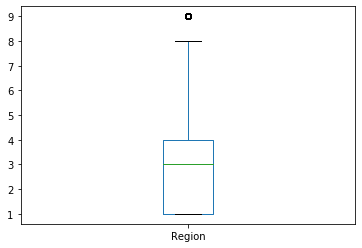

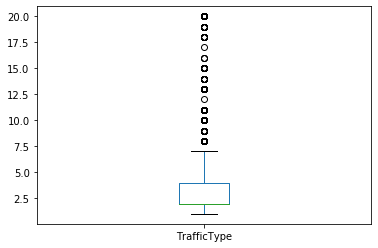

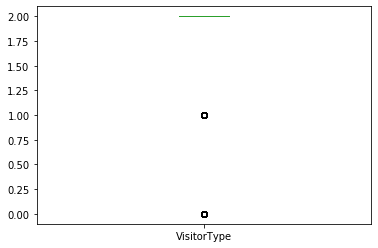

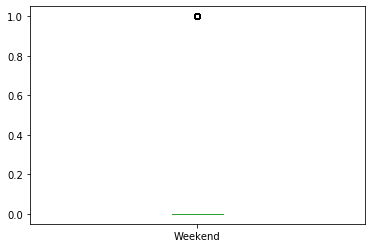

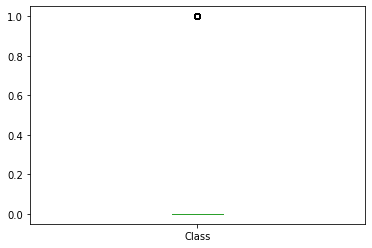

In [275]:
for idx,column in enumerate(dfwithdummies.columns): 
    plt.figure(idx)
    dfwithdummies.boxplot(column=column,grid=False)

Text(0, 0.5, 'Frequency')

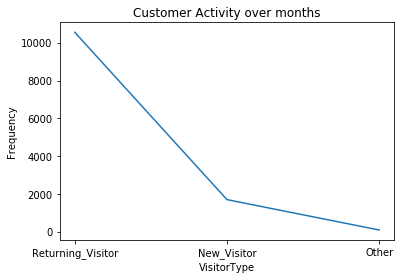

In [276]:
fig, ax = plt.subplots() 
data = X_train['VisitorType'].value_counts()
points = data.index 
frequency = data.values
ax.plot(points, frequency)
ax.set_title('Customer Activity over months') 
ax.set_xlabel('VisitorType') 
ax.set_ylabel('Frequency')

In [277]:
X = dfcleaned.drop('Class', axis = 1)
Y = dfcleaned['Class'].copy()

In [278]:
cor = X.corr()

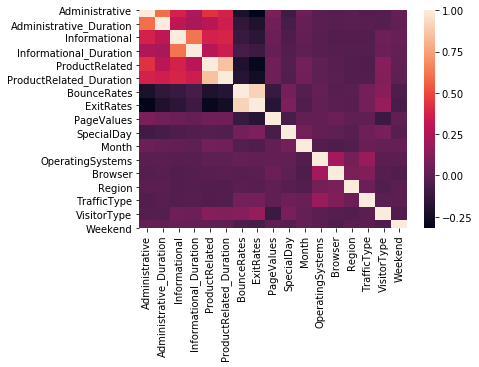

In [279]:
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns)

In [280]:
def AvgMinutes(Count, Duration):
    if Duration == 0:
        output = 0
    elif Duration != 0:
        output = float(Duration)/float(Count)
    return output
    
Columns = [['Administrative', 'Administrative_Duration'], ['Informational', 'Informational_Duration'], ['ProductRelated', 'ProductRelated_Duration']]
    
    
X['AvgAdministrative'] = X.apply(lambda x: AvgMinutes(Count = x['Administrative'], Duration = x['Administrative_Duration']), axis = 1)
X['AvgInformational'] = X.apply(lambda x: AvgMinutes(Count = x['Informational'], Duration = x['Informational_Duration']), axis = 1)
X['AvgProductRelated'] = X.apply(lambda x: AvgMinutes(Count = x['ProductRelated'], Duration = x['ProductRelated_Duration']), axis = 1)
X.drop(['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration'], axis = 1, inplace = True)

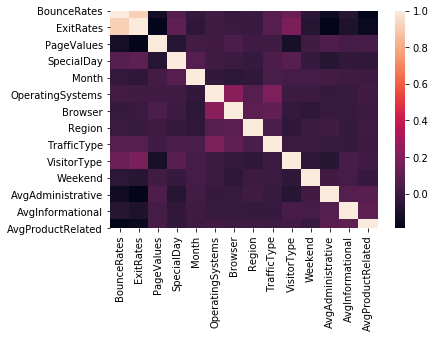

In [281]:
cor = X.corr()
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns)

In [282]:
for i in X.columns:
    print('Feature:',i)
    print('# of N/A:',X[i].isna().sum())

Feature: BounceRates
# of N/A: 0
Feature: ExitRates
# of N/A: 0
Feature: PageValues
# of N/A: 0
Feature: SpecialDay
# of N/A: 0
Feature: Month
# of N/A: 0
Feature: OperatingSystems
# of N/A: 0
Feature: Browser
# of N/A: 0
Feature: Region
# of N/A: 0
Feature: TrafficType
# of N/A: 0
Feature: VisitorType
# of N/A: 0
Feature: Weekend
# of N/A: 0
Feature: AvgAdministrative
# of N/A: 0
Feature: AvgInformational
# of N/A: 0
Feature: AvgProductRelated
# of N/A: 0


In [283]:
for i in X_train.columns:
    print('####################')
    print('COLUMN TITLE:',i)
    print('# UNIQUE VALUES:',len(X_train[i].unique()))
    print('UNIQUE VALUES:',X_train[i].unique())
    print('####################')
    print()

####################
COLUMN TITLE: Administrative
# UNIQUE VALUES: 27
UNIQUE VALUES: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
####################

####################
COLUMN TITLE: Administrative_Duration
# UNIQUE VALUES: 3335
UNIQUE VALUES: [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
####################

####################
COLUMN TITLE: Informational
# UNIQUE VALUES: 17
UNIQUE VALUES: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
####################

####################
COLUMN TITLE: Informational_Duration
# UNIQUE VALUES: 1258
UNIQUE VALUES: [  0.   120.    16.   ... 547.75 368.25 211.25]
####################

####################
COLUMN TITLE: ProductRelated
# UNIQUE VALUES: 311
UNIQUE VALUES: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29

<Figure size 432x288 with 0 Axes>

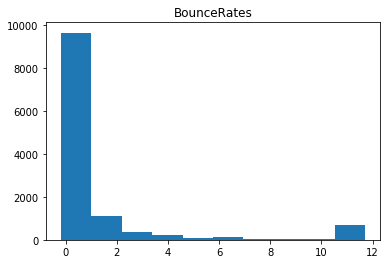

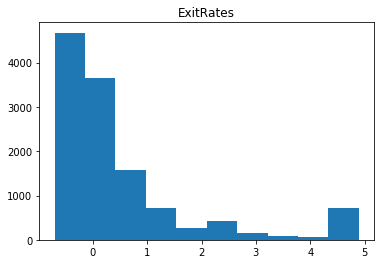

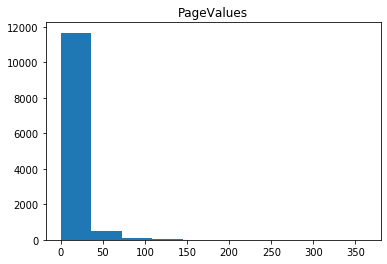

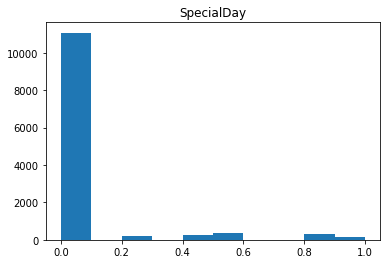

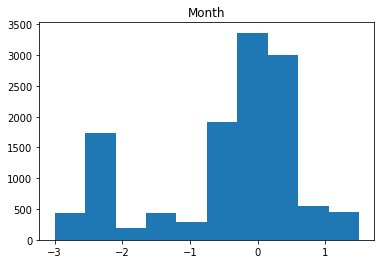

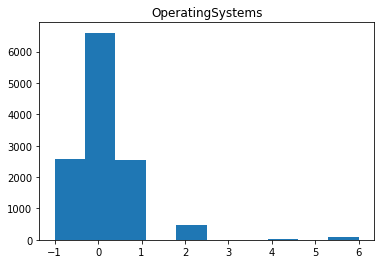

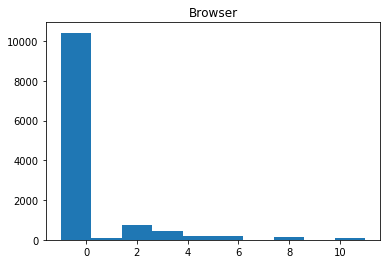

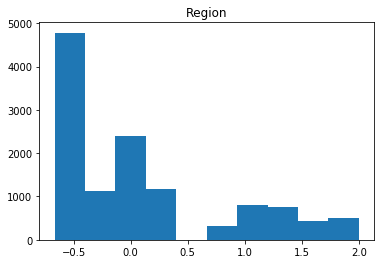

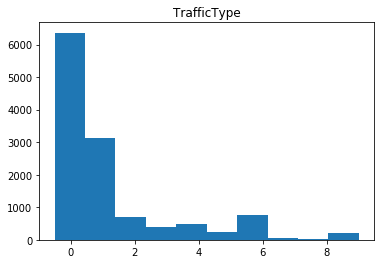

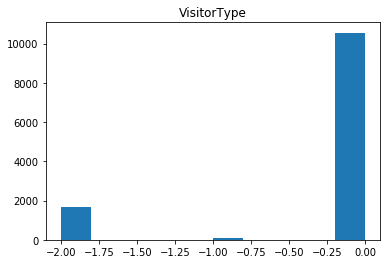

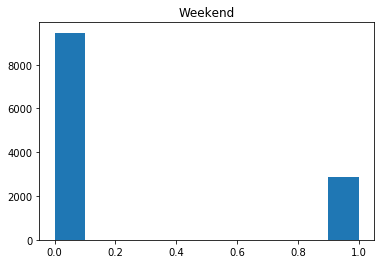

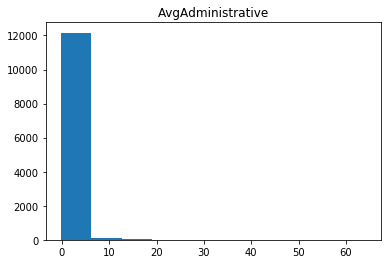

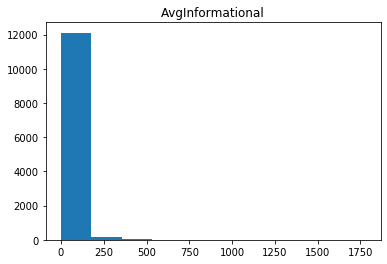

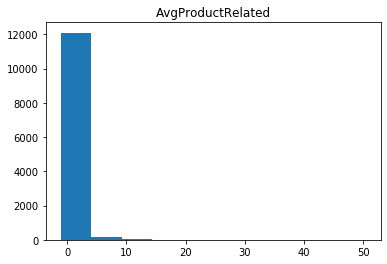

In [284]:
X_copy = X.copy()
rc = RobustScaler()
X_rc=rc.fit_transform(X_copy)
X_rc=pd.DataFrame(X_rc,columns=X.columns)

for idx,column in enumerate(X_rc.columns):
    plt.figure(idx)
    X_rc.hist(column=column,grid=False)

In [285]:
X_rc.describe()

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,AvgAdministrative,AvgInformational,AvgProductRelated
count,12330.000000,1.233000e+04,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,1.233000e+04,12330.000000,1.233000e+04
mean,1.134801,5.016591e-01,5.889258,0.061427,-0.418005,0.124006,0.357097,0.049121,1.034793,-0.281671,0.232603,6.200551e-01,14.807761,3.187161e-01
std,2.884054,1.360703e+00,18.568437,0.198917,1.185100,0.911325,1.717277,0.800530,2.012585,0.690759,0.422509,1.888150e+00,65.551312,1.629633e+00
min,-0.185128,-7.043793e-01,0.000000,0.000000,-3.000000,-1.000000,-1.000000,-0.666667,-0.500000,-2.000000,0.000000,-2.090165e-01,0.000000,-1.051218e+00
25%,-0.185128,-3.043793e-01,0.000000,0.000000,-0.500000,0.000000,0.000000,-0.666667,0.000000,0.000000,0.000000,-2.090165e-01,0.000000,-4.100630e-01
50%,0.000000,-4.857226e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.832302e-17,0.000000,6.465911e-17
75%,0.814872,6.956207e-01,0.000000,0.000000,0.500000,1.000000,0.000000,0.333333,1.000000,0.000000,0.000000,7.909835e-01,0.000000,5.899370e-01
max,11.710742,4.895621e+00,361.763742,1.000000,1.500000,6.000000,11.000000,2.000000,9.000000,0.000000,1.000000,6.410101e+01,1778.000000,5.031173e+01


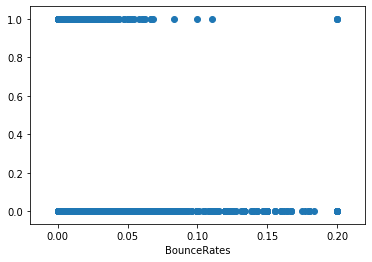

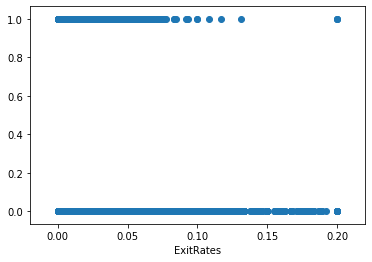

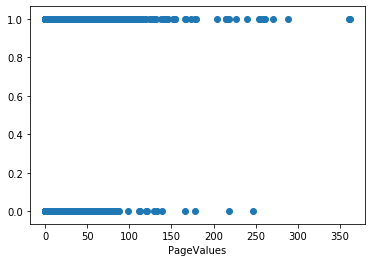

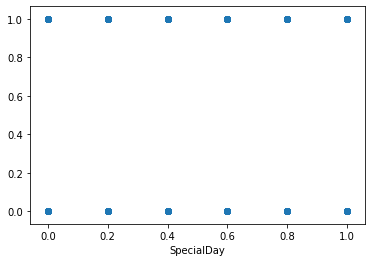

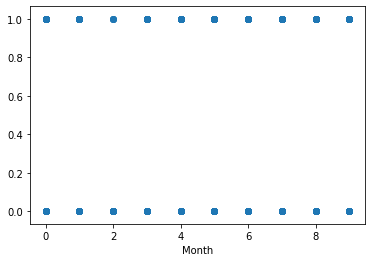

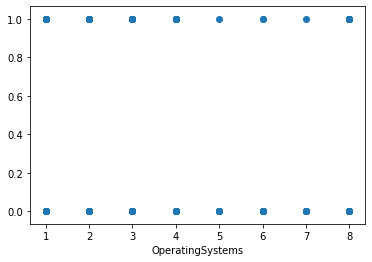

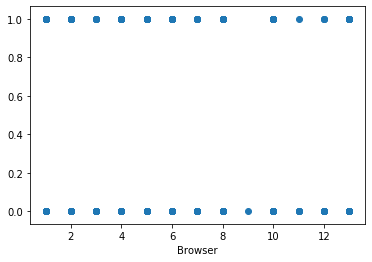

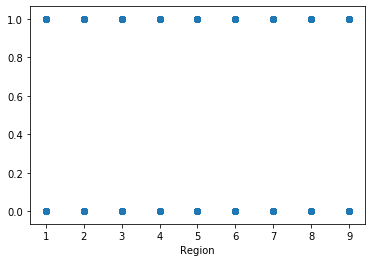

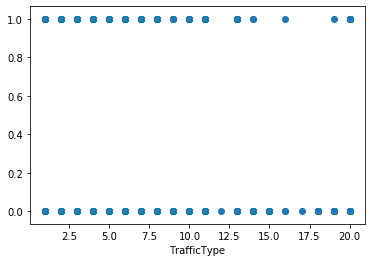

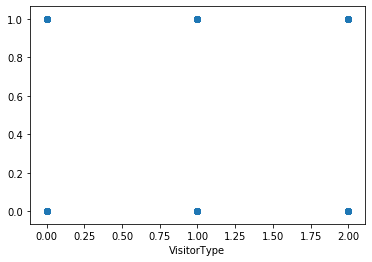

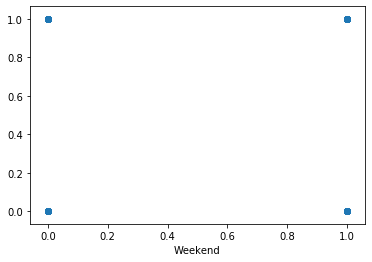

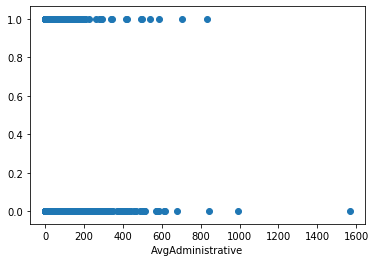

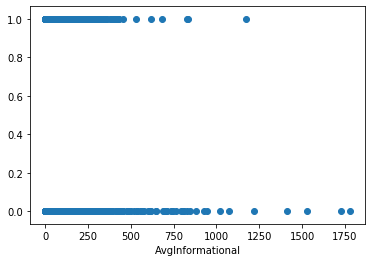

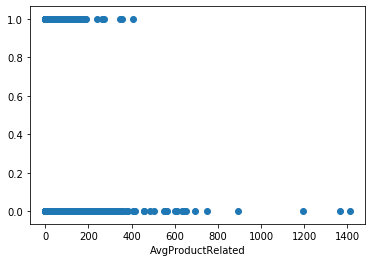

In [286]:
for idx,column in enumerate(X.columns): 
    ax=plt.figure(idx)
    plt.scatter(x=X[column],y=Y)
    plt.xlabel(column)

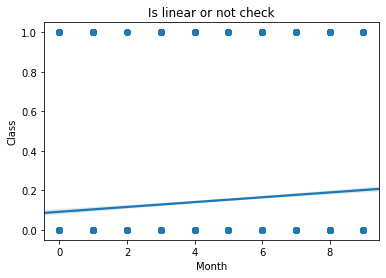

In [287]:
plt.title('Is linear or not check')
plt.xlabel('Month')
plt.ylabel('Revenue')
sns.regplot(x=X['Month'], y=Y)

In [288]:
from sklearn import linear_model
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_rc,Y,test_size=.2)

In [289]:
model = linear_model.SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [290]:
y_pred = model.predict(X_test)

In [291]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [292]:
y_pred_test = model.predict(X_test)

In [293]:
y_pred_train = model.predict(X_train)

In [294]:
accuracy_score(y_train, y_pred_train)

0.8658759124087592

In [295]:
accuracy_score(y_test, y_pred_test)

0.8653690186536902

In [296]:
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
list_one =[]
feature_ranking = SelectKBest(chi2, k=5)
fit = feature_ranking.fit(X, Y)

fmt = '%-8s%-20s%s'

for i, (score, feature) in enumerate(zip(feature_ranking.scores_, X.columns)):
    list_one.append((score, feature))
    
dfObj = pd.DataFrame(list_one) 
dfObj.sort_values(by=[0], ascending = False)

,0,1
2,175126.808512,PageValues
12,10662.599140,AvgInformational
11,6829.412944,AvgAdministrative
13,1143.263922,AvgProductRelated
4,86.163696,Month
3,53.797094,SpecialDay
9,37.547523,VisitorType
0,29.654336,BounceRates
1,28.985072,ExitRates
6,8.873291,Browser


In [297]:
X_rc.drop(['TrafficType','OperatingSystems'],axis=1,inplace=True)

In [298]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_rc,Y,test_size=.2)

In [299]:
model = XGBClassifier(learning_rate = 0.1, n_estimators=150, min_child_weight=3,  max_depth=13)
model.fit(X_train1, y_train1)

C:\Users\Divya\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:42:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=13,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [300]:
y_pred_test = model.predict(X_test1)

In [301]:
y_pred_train = model.predict(X_train1)

In [302]:
accuracy_score(y_train, y_pred_train)

0.7453365774533658

In [303]:
accuracy_score(y_test, y_pred_test)

0.7473641524736415